## Data Format
The following times are in the xx:yy - hour:minute format (e.g. 1536 means 3:36pm, 345 means 3:45am, 16 means 00:16am)

* scheduled_departure
* departure_time
* scheduled_arrival
* arrival_time
* wheels_off
* wheels_on


The following times are in minutes format (negatives mean actual_time is ahead of scheduled_time for the absolute value of that negative number)
* arrival_delay
* departure_delay
* taxi_in
* taxi_out
* scheduled_time
* elapsed_time
* air_time

Distance in miles

## Data Definition
* WHEELS_OFF Time - The time point that the aircraft's wheels leave the ground.
* WHEELS_ON Time - The time point that the aircraft's wheels touch on the ground.
* TAXI_OUT Time - The time duration elapsed between departure from the origin airport gate and wheels off.
* TAXI_IN Time - The time duration elapsed between wheels-on and gate arrival at the destination airport.
* AIR_TIME - The time duration between wheels_off and wheels_on time.

## Data Relationship
* arrival_time = wheels_on + taxi_in
* arrival_delay = arrival_time - scheduled_arrival
* departure_time = wheels_off - taxi_out
* departure_delay = departure_time - scheduled_departure
* elapsed_time =air_time + taxi_in + taxi_out
* air_time = wheels_on - wheels_off


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta

In [2]:
flights_df = pd.read_csv('../raw_data/flights.csv')
flights_df_raw = flights_df
airports_df = pd.read_csv('../raw_data/airports.csv')
airlines_df = pd.read_csv('../raw_data/airlines.csv')

<ipython-input-2-16a6980a82d9>:1: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  flights_df = pd.read_csv('../raw_data/flights.csv')


In [3]:
flights_df.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
airports_df.head()

,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
0,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.44040
1,ABI,Abilene Regional Airport,Abilene,TX,USA,32.41132,-99.68190
2,ABQ,Albuquerque International Sunport,Albuquerque,NM,USA,35.04022,-106.60919
3,ABR,Aberdeen Regional Airport,Aberdeen,SD,USA,45.44906,-98.42183
4,ABY,Southwest Georgia Regional Airport,Albany,GA,USA,31.53552,-84.19447


In [5]:
airlines_df.head()

,IATA_CODE,AIRLINE
0,UA,United Air Lines Inc.
1,AA,American Airlines Inc.
2,US,US Airways Inc.
3,F9,Frontier Airlines Inc.
4,B6,JetBlue Airways


In [6]:
dt_cols = ['SCHEDULED_DEPARTURE','DEPARTURE_TIME', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME','WHEELS_OFF','WHEELS_ON']


for column in dt_cols:
    flights_df[column] = flights_df[column].astype(str).str.split('.').str[0]
    flights_df[column] = flights_df[column].str.zfill(4)
    flights_df[column] = pd.to_datetime(flights_df[column], format='%H%M', errors='coerce').dt.time

In [8]:
flights_df[dt_cols]

,SCHEDULED_DEPARTURE,DEPARTURE_TIME,SCHEDULED_ARRIVAL,ARRIVAL_TIME,WHEELS_OFF,WHEELS_ON
0,00:05:00,23:54:00,04:30:00,04:08:00,00:15:00,04:04:00
1,00:10:00,00:02:00,07:50:00,07:41:00,00:14:00,07:37:00
2,00:20:00,00:18:00,08:06:00,08:11:00,00:34:00,08:00:00
3,00:20:00,00:15:00,08:05:00,07:56:00,00:30:00,07:48:00
4,00:25:00,00:24:00,03:20:00,02:59:00,00:35:00,02:54:00
...,...,...,...,...,...,...
5819074,23:59:00,23:55:00,08:19:00,07:53:00,00:17:00,07:49:00
5819075,23:59:00,23:55:00,04:46:00,04:30:00,00:12:00,04:27:00
5819076,23:59:00,23:50:00,04:40:00,04:32:00,00:07:00,04:24:00
5819077,23:59:00,23:53:00,03:40:00,03:30:00,00:03:00,03:27:00


In [9]:
flights_df[['SCHEDULED_DEPARTURE','DEPARTURE_TIME', 'DEPARTURE_DELAY']]

,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY
0,00:05:00,23:54:00,-11.0
1,00:10:00,00:02:00,-8.0
2,00:20:00,00:18:00,-2.0
3,00:20:00,00:15:00,-5.0
4,00:25:00,00:24:00,-1.0
...,...,...,...
5819074,23:59:00,23:55:00,-4.0
5819075,23:59:00,23:55:00,-4.0
5819076,23:59:00,23:50:00,-9.0
5819077,23:59:00,23:53:00,-6.0


In [10]:
flights_df[['SCHEDULED_ARRIVAL','ARRIVAL_TIME', 'ARRIVAL_DELAY']]

,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY
0,04:30:00,04:08:00,-22.0
1,07:50:00,07:41:00,-9.0
2,08:06:00,08:11:00,5.0
3,08:05:00,07:56:00,-9.0
4,03:20:00,02:59:00,-21.0
...,...,...,...
5819074,08:19:00,07:53:00,-26.0
5819075,04:46:00,04:30:00,-16.0
5819076,04:40:00,04:32:00,-8.0
5819077,03:40:00,03:30:00,-10.0


In [11]:
flights_df.columns

Index(['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'FLIGHT_NUMBER',
       'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT',
       'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE',
       'WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME',
       'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED', 'CANCELLATION_REASON',
       'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY',
       'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY'],
      dtype='object')

Since all the data is for 2015, there is no need to keep YEAR column in the data

In [12]:
flights_df.drop(columns = 'YEAR', inplace = True)

In [13]:
flights_df.columns

Index(['MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'FLIGHT_NUMBER',
       'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT',
       'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE',
       'WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME',
       'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED', 'CANCELLATION_REASON',
       'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY',
       'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY'],
      dtype='object')

In [14]:
flights_df.MONTH.value_counts()

MONTH
7     520718
8     510536
3     504312
6     503897
5     496993
10    486165
4     485151
12    479230
1     469968
11    467972
9     464946
2     429191
Name: count, dtype: int64

In [15]:
flights_df[~flights_df['MONTH'].isin([1,2,3,4,5,6,7,8,9,10,11,12])]

,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY


In [16]:
flights_df[~flights_df['DAY'].isin([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,
                                    19,20,21,22,23,24,25,26,27,28,29,30,31])]

,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY


In [17]:
flights_df[~flights_df['DAY_OF_WEEK'].isin([1,2,3,4,5,6,7])]

,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY


In [18]:
flights_df['AIRLINE'].unique()

array(['AS', 'AA', 'US', 'DL', 'NK', 'UA', 'HA', 'B6', 'OO', 'EV', 'MQ',
       'F9', 'WN', 'VX'], dtype=object)

In [19]:
for column in flights_df.columns:
    print(column)
    print(flights_df[column].unique())

MONTH
[ 1  2  3  4  5  6  7  8  9 10 11 12]
DAY
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31]
DAY_OF_WEEK
[4 5 6 7 1 2 3]
AIRLINE
['AS' 'AA' 'US' 'DL' 'NK' 'UA' 'HA' 'B6' 'OO' 'EV' 'MQ' 'F9' 'WN' 'VX']
FLIGHT_NUMBER
[  98 2336  840 ... 6777 6895 6887]
TAIL_NUMBER
['N407AS' 'N3KUAA' 'N171US' ... 'N7LEAA' 'N850DN' 'N8676A']
ORIGIN_AIRPORT
['ANC' 'LAX' 'SFO' 'SEA' 'LAS' 'DEN' 'SLC' 'PDX' 'FAI' 'MSP' 'PHX' 'SJU'
 'PBG' 'IAG' 'PSE' 'BQN' 'ORD' 'GEG' 'HNL' 'ONT' 'MCO' 'BOS' 'HIB' 'ABR'
 'MAF' 'DFW' 'MKE' 'IAH' 'BNA' 'BRO' 'VPS' 'BOI' 'BJI' 'SGF' 'PHL' 'SBN'
 'RDD' 'EUG' 'IAD' 'BUF' 'PWM' 'JFK' 'CRP' 'PIA' 'FAT' 'SMF' 'AUS' 'MCI'
 'ATL' 'JAX' 'MFR' 'IDA' 'MSN' 'DCA' 'SAT' 'CHS' 'SBA' 'SMX' 'IND' 'CLE'
 'GSP' 'BDL' 'ABI' 'RIC' 'BFL' 'OMA' 'RDM' 'FLL' 'CID' 'TPA' 'SYR' 'ROC'
 'TYR' 'LAN' 'XNA' 'GSO' 'EWR' 'PBI' 'RSW' 'OAK' 'PVD' 'RNO' 'PIT' 'ABQ'
 'MIA' 'BWI' 'LGA' 'TUL' 'LIT' 'MSY' 'OKC' 'ATW' 'PNS' 'MEM' 'TYS' 'MHT'
 'SAV' 'CLT' 'GRB' 'ABE' 'J

The columns below have 'nan' values:
* TAXI_OUT, 
* SCHEDULED_TIME
* TAXI_IN
* SECURITY_DELAY
* AIRLINE_DELAY
* LATE_AIRCRAFT_DELAY
* WEATHER_DELAY

Some airports have **Three-Letter Codes (e.g., JFK, LAX)** called the **IATA (International Air Transport Association)** airport codes. Some others have a **Five-Digit Codes (e.g., 12345)** called **FAA (Federal Aviation Administration)**. 

The three-letter IATA codes are for major airports used internationally, while the five-digit FAA codes are for smaller, often regional airports used primarily in the United States. 
They are the most commonly used codes for airports globally and are used for ticketing, baggage handling, and airline timetables. For example, JFK stands for John F. Kennedy International Airport in New York City.

In [20]:
flights_df[flights_df['ORIGIN_AIRPORT'].isin(['HYA','14747'])]

,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
2679591,6,18,4,B6,863,N368JB,HYA,JFK,13:09:00,13:09:00,...,14:00:00,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2697042,6,19,5,B6,863,N292JB,HYA,JFK,13:09:00,13:04:00,...,14:11:00,-10.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2713571,6,20,6,B6,863,N351JB,HYA,JFK,13:09:00,18:24:00,...,19:51:00,330.0,0,0,NaN,330.0,0.0,0.0,0.0,0.0
2728701,6,21,7,B6,863,N249JB,HYA,JFK,13:09:00,13:07:00,...,14:11:00,-10.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2746057,6,22,1,B6,863,N339JB,HYA,JFK,13:09:00,13:55:00,...,14:46:00,25.0,0,0,NaN,0.0,0.0,1.0,24.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4871826,10,31,6,DL,651,N696DL,14747,11433,23:30:00,23:27:00,...,05:19:00,-20.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4871830,10,31,6,AS,127,N318AS,14747,11630,23:30:00,23:26:00,...,02:00:00,48.0,0,0,NaN,48.0,0.0,0.0,0.0,0.0
4871851,10,31,6,AS,121,N763AS,14747,10299,23:55:00,23:57:00,...,02:30:00,56.0,0,0,NaN,56.0,0.0,0.0,0.0,0.0
4871863,10,31,6,AA,1283,N3HAAA,14747,13930,23:59:00,23:56:00,...,04:26:00,-19.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
airports_df

,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
0,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.44040
1,ABI,Abilene Regional Airport,Abilene,TX,USA,32.41132,-99.68190
2,ABQ,Albuquerque International Sunport,Albuquerque,NM,USA,35.04022,-106.60919
3,ABR,Aberdeen Regional Airport,Aberdeen,SD,USA,45.44906,-98.42183
4,ABY,Southwest Georgia Regional Airport,Albany,GA,USA,31.53552,-84.19447
...,...,...,...,...,...,...,...
317,WRG,Wrangell Airport,Wrangell,AK,USA,56.48433,-132.36982
318,WYS,Westerly State Airport,West Yellowstone,MT,USA,44.68840,-111.11764
319,XNA,Northwest Arkansas Regional Airport,Fayetteville/Springdale/Rogers,AR,USA,36.28187,-94.30681
320,YAK,Yakutat Airport,Yakutat,AK,USA,59.50336,-139.66023


In [22]:
flights_df[(flights_df['AIR_TIME'].isna()) & (flights_df['CANCELLED'] == 0)]

,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
724,1,1,4,DL,716,N944DL,OMA,ATL,06:45:00,06:37:00,...,14:51:00,NaN,1,0,NaN,NaN,NaN,NaN,NaN,NaN
1455,1,1,4,OO,5237,N712SK,MKE,IAH,07:45:00,07:42:00,...,15:05:00,NaN,1,0,NaN,NaN,NaN,NaN,NaN,NaN
2218,1,1,4,WN,1966,N685SW,ATL,JAX,08:45:00,09:22:00,...,12:19:00,NaN,1,0,NaN,NaN,NaN,NaN,NaN,NaN
2526,1,1,4,EV,4555,N12552,IAH,HRL,09:02:00,08:59:00,...,13:19:00,NaN,1,0,NaN,NaN,NaN,NaN,NaN,NaN
2866,1,1,4,WN,1081,N214WN,MDW,OKC,09:30:00,09:26:00,...,13:43:00,NaN,1,0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5813860,12,31,4,UA,1291,N596UA,LIH,LAX,14:05:00,19:01:00,...,NaT,NaN,1,0,NaN,NaN,NaN,NaN,NaN,NaN
5815052,12,31,4,EV,2785,N684JW,DFW,BRO,15:30:00,15:55:00,...,NaT,NaN,1,0,NaN,NaN,NaN,NaN,NaN,NaN
5816657,12,31,4,UA,291,N76505,IAD,SMF,17:35:00,17:40:00,...,22:16:00,NaN,1,0,NaN,NaN,NaN,NaN,NaN,NaN
5817342,12,31,4,MQ,3060,N648MQ,DFW,FAR,18:30:00,18:40:00,...,22:50:00,NaN,1,0,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
flights_df[flights_df['DIVERTED'] == 1]

,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
724,1,1,4,DL,716,N944DL,OMA,ATL,06:45:00,06:37:00,...,14:51:00,NaN,1,0,NaN,NaN,NaN,NaN,NaN,NaN
1455,1,1,4,OO,5237,N712SK,MKE,IAH,07:45:00,07:42:00,...,15:05:00,NaN,1,0,NaN,NaN,NaN,NaN,NaN,NaN
2218,1,1,4,WN,1966,N685SW,ATL,JAX,08:45:00,09:22:00,...,12:19:00,NaN,1,0,NaN,NaN,NaN,NaN,NaN,NaN
2526,1,1,4,EV,4555,N12552,IAH,HRL,09:02:00,08:59:00,...,13:19:00,NaN,1,0,NaN,NaN,NaN,NaN,NaN,NaN
2866,1,1,4,WN,1081,N214WN,MDW,OKC,09:30:00,09:26:00,...,13:43:00,NaN,1,0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5813860,12,31,4,UA,1291,N596UA,LIH,LAX,14:05:00,19:01:00,...,NaT,NaN,1,0,NaN,NaN,NaN,NaN,NaN,NaN
5815052,12,31,4,EV,2785,N684JW,DFW,BRO,15:30:00,15:55:00,...,NaT,NaN,1,0,NaN,NaN,NaN,NaN,NaN,NaN
5816657,12,31,4,UA,291,N76505,IAD,SMF,17:35:00,17:40:00,...,22:16:00,NaN,1,0,NaN,NaN,NaN,NaN,NaN,NaN
5817342,12,31,4,MQ,3060,N648MQ,DFW,FAR,18:30:00,18:40:00,...,22:50:00,NaN,1,0,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
flights_df.isna().sum()

MONTH                        0
DAY                          0
DAY_OF_WEEK                  0
AIRLINE                      0
FLIGHT_NUMBER                0
TAIL_NUMBER              14721
ORIGIN_AIRPORT               0
DESTINATION_AIRPORT          0
SCHEDULED_DEPARTURE          0
DEPARTURE_TIME           86666
DEPARTURE_DELAY          86153
TAXI_OUT                 89047
WHEELS_OFF               89774
SCHEDULED_TIME               6
ELAPSED_TIME            105071
AIR_TIME                105071
DISTANCE                     0
WHEELS_ON                94518
TAXI_IN                  92513
SCHEDULED_ARRIVAL            2
ARRIVAL_TIME             94969
ARRIVAL_DELAY           105071
DIVERTED                     0
CANCELLED                    0
CANCELLATION_REASON    5729195
AIR_SYSTEM_DELAY       4755640
SECURITY_DELAY         4755640
AIRLINE_DELAY          4755640
LATE_AIRCRAFT_DELAY    4755640
WEATHER_DELAY          4755640
dtype: int64

<Axes: >

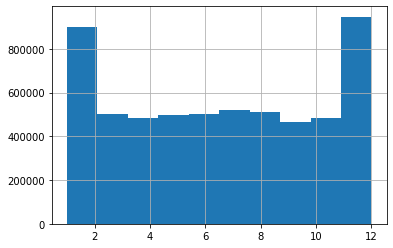

In [26]:
flights_df.MONTH.hist()

In [27]:
flights_df.MONTH.isna().any()

False

No missing data in column Months, Also a lot more data in the months of January and December

<Axes: >

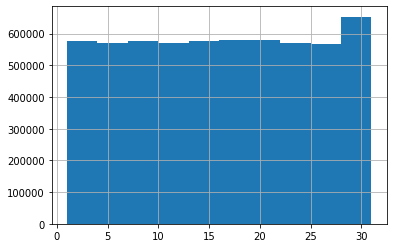

In [29]:
flights_df.DAY.hist()

In [32]:
flights_df.DAY.isna().any()

False

No missing data in the column DAY, Also there are more flights in the last few days of the month (27th through 30th)

<Axes: >

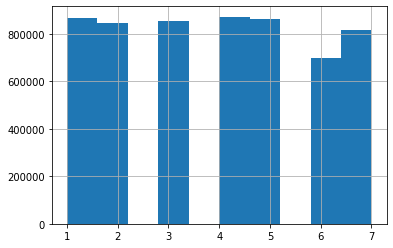

In [33]:
flights_df.DAY_OF_WEEK.hist()

In [34]:
flights_df.DAY_OF_WEEK.isna().any()

False

* 1 = Monday
* 7 = Sunday

No missign data in Day of the week column, there are pretty much the same number of flights throughout the week, there is slightly less number of flights in the 6th day of the week (Saturdays).

scheduled_departure
* departure_time
* scheduled_arrival
* arrival_time
* wheels_off
* wheels_on

In [35]:
flights_df.columns

Index(['MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'FLIGHT_NUMBER',
       'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT',
       'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE',
       'WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME',
       'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED', 'CANCELLATION_REASON',
       'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY',
       'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY'],
      dtype='object')

In [36]:
flights_df[['SCHEDULED_DEPARTURE','DEPARTURE_TIME', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME','WHEELS_OFF','WHEELS_ON']]

,SCHEDULED_DEPARTURE,DEPARTURE_TIME,SCHEDULED_ARRIVAL,ARRIVAL_TIME,WHEELS_OFF,WHEELS_ON
0,00:05:00,23:54:00,04:30:00,04:08:00,00:15:00,04:04:00
1,00:10:00,00:02:00,07:50:00,07:41:00,00:14:00,07:37:00
2,00:20:00,00:18:00,08:06:00,08:11:00,00:34:00,08:00:00
3,00:20:00,00:15:00,08:05:00,07:56:00,00:30:00,07:48:00
4,00:25:00,00:24:00,03:20:00,02:59:00,00:35:00,02:54:00
...,...,...,...,...,...,...
5819074,23:59:00,23:55:00,08:19:00,07:53:00,00:17:00,07:49:00
5819075,23:59:00,23:55:00,04:46:00,04:30:00,00:12:00,04:27:00
5819076,23:59:00,23:50:00,04:40:00,04:32:00,00:07:00,04:24:00
5819077,23:59:00,23:53:00,03:40:00,03:30:00,00:03:00,03:27:00


In [39]:
flights_df[(flights_df['WHEELS_OFF'].isna()) & (flights_df['CANCELLED'] != 1)][['SCHEDULED_DEPARTURE','DEPARTURE_TIME', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME','WHEELS_OFF','WHEELS_ON']]

,SCHEDULED_DEPARTURE,DEPARTURE_TIME,SCHEDULED_ARRIVAL,ARRIVAL_TIME,WHEELS_OFF,WHEELS_ON
13849,23:10:00,23:48:00,00:06:00,00:24:00,NaN,00:20:00
13877,23:30:00,23:30:00,05:10:00,05:32:00,NaN,05:27:00
27361,18:25:00,23:40:00,19:40:00,01:06:00,NaN,00:51:00
29606,20:55:00,23:51:00,21:30:00,00:25:00,NaN,00:21:00
30641,23:50:00,23:49:00,01:52:00,01:50:00,NaN,01:47:00
...,...,...,...,...,...,...
5789630,23:50:00,23:43:00,08:40:00,08:31:00,NaN,08:15:00
5805225,21:50:00,23:51:00,00:23:00,02:16:00,NaN,02:10:00
5805889,23:50:00,23:44:00,06:00:00,05:34:00,NaN,05:25:00
5819046,23:55:00,23:48:00,05:33:00,05:17:00,NaN,05:09:00


In [40]:
flights_df['WHEELS_OFF'].value_counts()

WHEELS_OFF
06:10:00    9313
06:09:00    9246
06:08:00    9088
06:11:00    8870
06:07:00    8678
            ... 
04:52:00       6
04:02:00       5
04:46:00       5
04:07:00       5
04:50:00       3
Name: count, Length: 1439, dtype: int64

In [41]:
flights_df[flights_df['WHEELS_OFF'].isna()][['CANCELLED','WHEELS_OFF']]

,CANCELLED,WHEELS_OFF
32,1,NaN
42,1,NaN
68,1,NaN
82,1,NaN
90,1,NaN
...,...,...
5818318,1,NaN
5818777,1,NaN
5818843,1,NaN
5819046,0,NaN


In [42]:
flights_df[['WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE','WHEELS_ON']]

,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON
0,00:15:00,205.0,194.0,169.0,1448,04:04:00
1,00:14:00,280.0,279.0,263.0,2330,07:37:00
2,00:34:00,286.0,293.0,266.0,2296,08:00:00
3,00:30:00,285.0,281.0,258.0,2342,07:48:00
4,00:35:00,235.0,215.0,199.0,1448,02:54:00
...,...,...,...,...,...,...
5819074,00:17:00,320.0,298.0,272.0,2611,07:49:00
5819075,00:12:00,227.0,215.0,195.0,1617,04:27:00
5819076,00:07:00,221.0,222.0,197.0,1598,04:24:00
5819077,00:03:00,161.0,157.0,144.0,1189,03:27:00


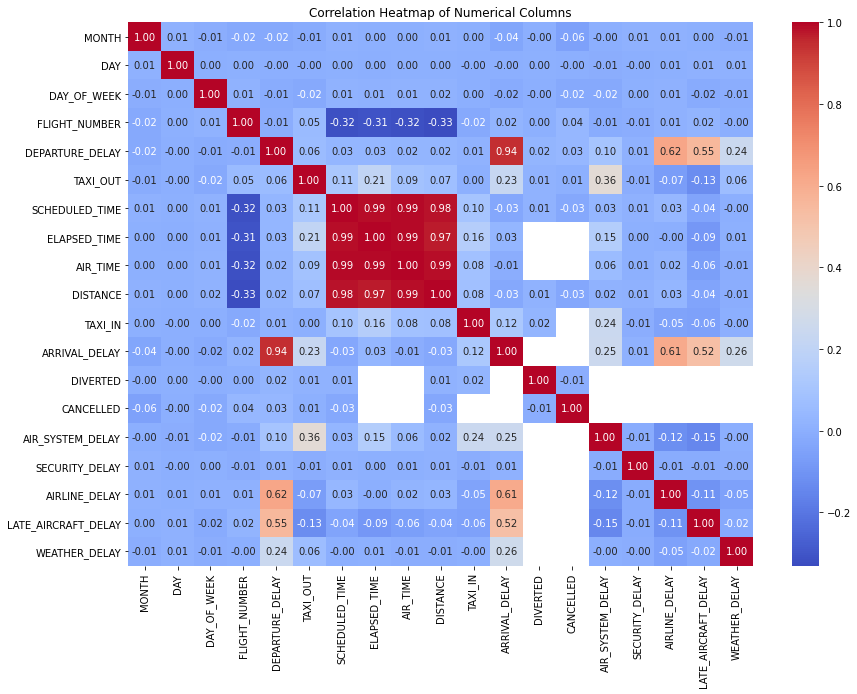

In [43]:
numerical_columns = flights_df.select_dtypes(include=[np.number])

correlation_matrix = numerical_columns.corr()

# Plot the heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Columns')
plt.show()

<Axes: >

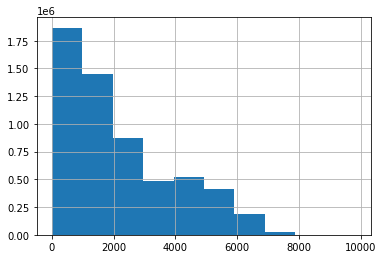

In [44]:
flights_df['FLIGHT_NUMBER'].hist()

In [45]:
flights_df.SCHEDULED_DEPARTURE.unique()

array([datetime.time(0, 5), datetime.time(0, 10), datetime.time(0, 20),
       ..., datetime.time(4, 21), datetime.time(3, 37),
       datetime.time(4, 9)], dtype=object)

In [46]:
flights_df.SCHEDULED_DEPARTURE.isna().any()

False

In [47]:
flights_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5819079 entries, 0 to 5819078
Data columns (total 30 columns):
 #   Column               Dtype  
---  ------               -----  
 0   MONTH                int64  
 1   DAY                  int64  
 2   DAY_OF_WEEK          int64  
 3   AIRLINE              object 
 4   FLIGHT_NUMBER        int64  
 5   TAIL_NUMBER          object 
 6   ORIGIN_AIRPORT       object 
 7   DESTINATION_AIRPORT  object 
 8   SCHEDULED_DEPARTURE  object 
 9   DEPARTURE_TIME       object 
 10  DEPARTURE_DELAY      float64
 11  TAXI_OUT             float64
 12  WHEELS_OFF           object 
 13  SCHEDULED_TIME       float64
 14  ELAPSED_TIME         float64
 15  AIR_TIME             float64
 16  DISTANCE             int64  
 17  WHEELS_ON            object 
 18  TAXI_IN              float64
 19  SCHEDULED_ARRIVAL    object 
 20  ARRIVAL_TIME         object 
 21  ARRIVAL_DELAY        float64
 22  DIVERTED             int64  
 23  CANCELLED            int64  
 24

In [48]:
airports_df.head()

,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
0,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.44040
1,ABI,Abilene Regional Airport,Abilene,TX,USA,32.41132,-99.68190
2,ABQ,Albuquerque International Sunport,Albuquerque,NM,USA,35.04022,-106.60919
3,ABR,Aberdeen Regional Airport,Aberdeen,SD,USA,45.44906,-98.42183
4,ABY,Southwest Georgia Regional Airport,Albany,GA,USA,31.53552,-84.19447


In [49]:
airlines_df.head()

,IATA_CODE,AIRLINE
0,UA,United Air Lines Inc.
1,AA,American Airlines Inc.
2,US,US Airways Inc.
3,F9,Frontier Airlines Inc.
4,B6,JetBlue Airways


In [50]:
flights_df.columns

Index(['MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'FLIGHT_NUMBER',
       'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT',
       'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE',
       'WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME',
       'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED', 'CANCELLATION_REASON',
       'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY',
       'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY'],
      dtype='object')

Cancellation Codes

* (A) Air Carrier;
* (B) Extreme Weather;
* (C) National Aviation System (NAS); and
* (D) Security.

In [51]:
flights_df.CANCELLATION_REASON.unique()

array([nan, 'A', 'B', 'C', 'D'], dtype=object)

In [52]:
flights_df[flights_df['CANCELLATION_REASON'].isna()]['CANCELLED'].unique()

array([0], dtype=int64)

In [53]:
flights_df['CANCELLATION_REASON'] = flights_df['CANCELLATION_REASON'].fillna('Not Canceled')

In [54]:
flights_df.CANCELLATION_REASON.unique()

array(['Not Canceled', 'A', 'B', 'C', 'D'], dtype=object)

In [55]:
flights_df.columns

Index(['MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'FLIGHT_NUMBER',
       'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT',
       'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE',
       'WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME',
       'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED', 'CANCELLATION_REASON',
       'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY',
       'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY'],
      dtype='object')

In [57]:
delay_col = ['DEPARTURE_DELAY', 'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'ARRIVAL_DELAY',
             'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY']

for del_col in delay_col:
    print(del_col)
    print(flights_df[del_col].value_counts())
    print('Number of missing values:', sum(flights_df[del_col].isna()))
    print("-----------------------------------------")
    print("")
    

DEPARTURE_DELAY
DEPARTURE_DELAY
-3.0       455407
-4.0       444053
-5.0       438844
-2.0       435237
-1.0       387475
            ...  
 1079.0         1
 1347.0         1
-61.0           1
 859.0          1
 1649.0         1
Name: count, Length: 1217, dtype: int64
Number of missing values: 86153
-----------------------------------------

AIR_SYSTEM_DELAY
AIR_SYSTEM_DELAY
0.0      498613
1.0       28003
15.0      23199
2.0       22981
3.0       21446
          ...  
518.0         1
578.0         1
453.0         1
872.0         1
477.0         1
Name: count, Length: 570, dtype: int64
Number of missing values: 4755640
-----------------------------------------

SECURITY_DELAY
SECURITY_DELAY
0.0      1059955
15.0         158
8.0          127
10.0         125
12.0         124
          ...   
214.0          1
196.0          1
256.0          1
110.0          1
105.0          1
Name: count, Length: 154, dtype: int64
Number of missing values: 4755640
---------------------------------------

The missing values in delay columns mean that there were no delay due to that reason. Therefore those missing values can be imputed by 0. However, the reason for the delay can also be captured in a sepate column which could be a good feature later in the modeling peice.

In [58]:
for del_col in delay_col:
    print(del_col)
    print(flights_df[flights_df[del_col].isna()]['CANCELLED'].unique())


DEPARTURE_DELAY
[1]
AIR_SYSTEM_DELAY
[0 1]
SECURITY_DELAY
[0 1]
ARRIVAL_DELAY
[1 0]
AIRLINE_DELAY
[0 1]
LATE_AIRCRAFT_DELAY
[0 1]
WEATHER_DELAY
[0 1]


Imputation of Delay columns

In [59]:
for del_col in delay_col:
    print(del_col)
    flights_df[del_col].fillna(0, inplace=True)

DEPARTURE_DELAY
AIR_SYSTEM_DELAY
SECURITY_DELAY
ARRIVAL_DELAY
AIRLINE_DELAY
LATE_AIRCRAFT_DELAY
WEATHER_DELAY


In [60]:
for del_col in delay_col:
    print(del_col)
    print(flights_df[del_col].value_counts())
    print('Number of missing values:', sum(flights_df[del_col].isna()))
    print("-----------------------------------------")
    print("")

DEPARTURE_DELAY
DEPARTURE_DELAY
-3.0       455407
-4.0       444053
-5.0       438844
-2.0       435237
 0.0       415513
            ...  
 1079.0         1
 1347.0         1
-61.0           1
 859.0          1
 1649.0         1
Name: count, Length: 1217, dtype: int64
Number of missing values: 0
-----------------------------------------

AIR_SYSTEM_DELAY
AIR_SYSTEM_DELAY
0.0      5254253
1.0        28003
15.0       23199
2.0        22981
3.0        21446
          ...   
518.0          1
578.0          1
453.0          1
872.0          1
477.0          1
Name: count, Length: 570, dtype: int64
Number of missing values: 0
-----------------------------------------

SECURITY_DELAY
SECURITY_DELAY
0.0      5815595
15.0         158
8.0          127
10.0         125
12.0         124
          ...   
214.0          1
196.0          1
256.0          1
110.0          1
105.0          1
Name: count, Length: 154, dtype: int64
Number of missing values: 0
-----------------------------------------

A

In [61]:
flights_df.isna().sum()

MONTH                       0
DAY                         0
DAY_OF_WEEK                 0
AIRLINE                     0
FLIGHT_NUMBER               0
TAIL_NUMBER             14721
ORIGIN_AIRPORT              0
DESTINATION_AIRPORT         0
SCHEDULED_DEPARTURE         0
DEPARTURE_TIME          86666
DEPARTURE_DELAY             0
TAXI_OUT                89047
WHEELS_OFF              89774
SCHEDULED_TIME              6
ELAPSED_TIME           105071
AIR_TIME               105071
DISTANCE                    0
WHEELS_ON               94518
TAXI_IN                 92513
SCHEDULED_ARRIVAL           2
ARRIVAL_TIME            94969
ARRIVAL_DELAY               0
DIVERTED                    0
CANCELLED                   0
CANCELLATION_REASON         0
AIR_SYSTEM_DELAY            0
SECURITY_DELAY              0
AIRLINE_DELAY               0
LATE_AIRCRAFT_DELAY         0
WEATHER_DELAY               0
dtype: int64

Canceled Flights do not have departure time, but we also see some flights that were not cancelled or diverted byut have missing departure times. 

Bring in **City** information by merging with the other dataframes

In [62]:
# Data Merging
# Merge flights data with airlines data
flights_df = flights_df.merge(airlines_df, how='left', left_on='AIRLINE', right_on='IATA_CODE').drop('IATA_CODE', axis=1)

# Merge flights data with origin and destination airport data
flights_df = flights_df.merge(airports_df, how='left', left_on='ORIGIN_AIRPORT', right_on='IATA_CODE').drop('IATA_CODE', axis=1)
flights_df = flights_df.merge(airports_df, how='left', left_on='DESTINATION_AIRPORT', right_on='IATA_CODE', suffixes=('_ORIGIN', '_DESTINATION')).drop('IATA_CODE', axis=1)


In [63]:
flights_df.head()

,MONTH,DAY,DAY_OF_WEEK,AIRLINE_x,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,...,STATE_ORIGIN,COUNTRY_ORIGIN,LATITUDE_ORIGIN,LONGITUDE_ORIGIN,AIRPORT_DESTINATION,CITY_DESTINATION,STATE_DESTINATION,COUNTRY_DESTINATION,LATITUDE_DESTINATION,LONGITUDE_DESTINATION
0,1,1,4,AS,98,N407AS,ANC,SEA,00:05:00,23:54:00,...,AK,USA,61.17432,-149.99619,Seattle-Tacoma International Airport,Seattle,WA,USA,47.44898,-122.30931
1,1,1,4,AA,2336,N3KUAA,LAX,PBI,00:10:00,00:02:00,...,CA,USA,33.94254,-118.40807,Palm Beach International Airport,West Palm Beach,FL,USA,26.68316,-80.09559
2,1,1,4,US,840,N171US,SFO,CLT,00:20:00,00:18:00,...,CA,USA,37.61900,-122.37484,Charlotte Douglas International Airport,Charlotte,NC,USA,35.21401,-80.94313
3,1,1,4,AA,258,N3HYAA,LAX,MIA,00:20:00,00:15:00,...,CA,USA,33.94254,-118.40807,Miami International Airport,Miami,FL,USA,25.79325,-80.29056
4,1,1,4,AS,135,N527AS,SEA,ANC,00:25:00,00:24:00,...,WA,USA,47.44898,-122.30931,Ted Stevens Anchorage International Airport,Anchorage,AK,USA,61.17432,-149.99619


In [64]:
flights_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5819079 entries, 0 to 5819078
Data columns (total 43 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   MONTH                  int64  
 1   DAY                    int64  
 2   DAY_OF_WEEK            int64  
 3   AIRLINE_x              object 
 4   FLIGHT_NUMBER          int64  
 5   TAIL_NUMBER            object 
 6   ORIGIN_AIRPORT         object 
 7   DESTINATION_AIRPORT    object 
 8   SCHEDULED_DEPARTURE    object 
 9   DEPARTURE_TIME         object 
 10  DEPARTURE_DELAY        float64
 11  TAXI_OUT               float64
 12  WHEELS_OFF             object 
 13  SCHEDULED_TIME         float64
 14  ELAPSED_TIME           float64
 15  AIR_TIME               float64
 16  DISTANCE               int64  
 17  WHEELS_ON              object 
 18  TAXI_IN                float64
 19  SCHEDULED_ARRIVAL      object 
 20  ARRIVAL_TIME           object 
 21  ARRIVAL_DELAY          float64
 22  DIVERTED          

In [65]:
flights_df[flights_df['DEPARTURE_TIME'].isna()]['CANCELLED'].unique()

array([1, 0], dtype=int64)

In [66]:
flights_df.columns

Index(['MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE_x', 'FLIGHT_NUMBER',
       'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT',
       'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE',
       'WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME',
       'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED', 'CANCELLATION_REASON',
       'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY',
       'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY', 'AIRLINE_y', 'AIRPORT_ORIGIN',
       'CITY_ORIGIN', 'STATE_ORIGIN', 'COUNTRY_ORIGIN', 'LATITUDE_ORIGIN',
       'LONGITUDE_ORIGIN', 'AIRPORT_DESTINATION', 'CITY_DESTINATION',
       'STATE_DESTINATION', 'COUNTRY_DESTINATION', 'LATITUDE_DESTINATION',
       'LONGITUDE_DESTINATION'],
      dtype='object')

In [67]:
time_cols = ['SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT',
       'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE',
       'WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME',
       'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED']

In [68]:
flights_df[(flights_df['DEPARTURE_TIME'].isna()) & (flights_df['CANCELLED'] ==0)][time_cols]

,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED
30657,23:55:00,NaN,5.0,17.0,00:17:00,161.0,161.0,140.0,1189,03:37:00,4.0,03:36:00,03:41:00,5.0,0,0
30682,23:59:00,NaN,1.0,21.0,00:21:00,227.0,219.0,187.0,1617,04:28:00,11.0,04:46:00,04:39:00,-7.0,0,0
42698,17:59:00,NaN,361.0,10.0,00:10:00,206.0,216.0,201.0,1157,02:31:00,5.0,20:25:00,02:36:00,371.0,0,0
60538,19:50:00,NaN,250.0,11.0,00:11:00,92.0,87.0,66.0,315,00:17:00,10.0,20:22:00,00:27:00,245.0,0,0
62119,22:05:00,NaN,115.0,11.0,00:11:00,59.0,57.0,40.0,212,00:51:00,6.0,23:04:00,00:57:00,113.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5785327,17:25:00,NaN,395.0,14.0,00:14:00,112.0,106.0,87.0,496,01:41:00,5.0,19:17:00,01:46:00,389.0,0,0
5789622,23:47:00,NaN,13.0,16.0,00:16:00,267.0,255.0,234.0,2174,07:10:00,5.0,07:14:00,07:15:00,1.0,0,0
5789623,23:49:00,NaN,11.0,29.0,00:29:00,289.0,276.0,241.0,2288,07:30:00,6.0,07:38:00,07:36:00,-2.0,0,0
5819014,23:35:00,NaN,25.0,16.0,00:16:00,230.0,209.0,186.0,1747,06:22:00,7.0,06:25:00,06:29:00,4.0,0,0


Some rows have missing departure time but we can calculate the dpearture time using their scheduled departure and departure delay columns.

In [69]:
flights_df['DEPARTURE_DELAY'] = pd.to_numeric(flights_df['DEPARTURE_DELAY'], errors='coerce')

# Function to add minutes to a time object
def add_minutes(time_obj, minutes):
    full_datetime = datetime.combine(datetime.today(), time_obj)
    new_datetime = full_datetime + timedelta(minutes=minutes)
    return new_datetime.time()

# Identify rows where DEPARTURE_TIME is missing and the flight is not canceled
missing_departure_time = (flights_df['DEPARTURE_TIME'].isna()) & (flights_df['CANCELLED'] == 0)

# Fill missing DEPARTURE_TIME
for index, row in flights_df[missing_departure_time].iterrows():
    if pd.notna(row['SCHEDULED_DEPARTURE']) and pd.notna(row['DEPARTURE_DELAY']):
        new_time = add_minutes(row['SCHEDULED_DEPARTURE'], int(row['DEPARTURE_DELAY']))
        flights_df.at[index, 'DEPARTURE_TIME'] = new_time

Now check if the departure times are calculated correctly for those flights:

In [70]:
flights_df[missing_departure_time][['SCHEDULED_DEPARTURE','DEPARTURE_TIME','DEPARTURE_DELAY']]

,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY
30657,23:55:00,00:00:00,5.0
30682,23:59:00,00:00:00,1.0
42698,17:59:00,00:00:00,361.0
60538,19:50:00,00:00:00,250.0
62119,22:05:00,00:00:00,115.0
...,...,...,...
5785327,17:25:00,00:00:00,395.0
5789622,23:47:00,00:00:00,13.0
5789623,23:49:00,00:00:00,11.0
5819014,23:35:00,00:00:00,25.0


It sounds like all of the departed at midnight.

In [71]:
flights_df[flights_df['DEPARTURE_TIME'].isna()]['CANCELLED'].unique()

array([1], dtype=int64)

The only flights that have missing dpearture time are those that were cancelled.

Now we look at **ARRIVAL_TIME**

In [72]:
flights_df[flights_df['ARRIVAL_TIME'].isna()]['CANCELLED'].unique()

array([1, 0], dtype=int64)

In [74]:
flights_df[(flights_df['ARRIVAL_TIME'].isna()) & (flights_df['CANCELLED'] == 0)]

,MONTH,DAY,DAY_OF_WEEK,AIRLINE_x,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,...,STATE_ORIGIN,COUNTRY_ORIGIN,LATITUDE_ORIGIN,LONGITUDE_ORIGIN,AIRPORT_DESTINATION,CITY_DESTINATION,STATE_DESTINATION,COUNTRY_DESTINATION,LATITUDE_DESTINATION,LONGITUDE_DESTINATION
4639,1,1,4,EV,4654,N29515,IAH,HRL,11:25:00,12:06:00,...,TX,USA,29.98047,-95.33972,Valley International Airport,Harlingen,TX,USA,26.22851,-97.65439
7281,1,1,4,EV,4654,N14543,CRP,HRL,14:10:00,17:36:00,...,TX,USA,27.77036,-97.50122,Valley International Airport,Harlingen,TX,USA,26.22851,-97.65439
7508,1,1,4,OO,5488,N791SK,IAH,ASE,14:27:00,14:36:00,...,TX,USA,29.98047,-95.33972,Aspen-Pitkin County Airport,Aspen,CO,USA,39.22316,-106.86885
8944,1,1,4,AA,152,N3DHAA,PHX,MIA,15:59:00,17:54:00,...,AZ,USA,33.43417,-112.00806,Miami International Airport,Miami,FL,USA,25.79325,-80.29056
11120,1,1,4,OO,5203,N774SK,LAX,ASE,18:16:00,18:40:00,...,CA,USA,33.94254,-118.40807,Aspen-Pitkin County Airport,Aspen,CO,USA,39.22316,-106.86885
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5811879,12,31,4,EV,2749,N676AE,DFW,BRO,11:55:00,12:09:00,...,TX,USA,32.89595,-97.03720,Brownsville/South Padre Island International A...,Brownsville,TX,USA,25.90683,-97.42586
5813860,12,31,4,UA,1291,N596UA,LIH,LAX,14:05:00,19:01:00,...,HI,USA,21.97598,-159.33896,Los Angeles International Airport,Los Angeles,CA,USA,33.94254,-118.40807
5815052,12,31,4,EV,2785,N684JW,DFW,BRO,15:30:00,15:55:00,...,TX,USA,32.89595,-97.03720,Brownsville/South Padre Island International A...,Brownsville,TX,USA,25.90683,-97.42586
5815704,12,31,4,AS,750,N479AS,SEA,ATL,16:15:00,16:10:00,...,WA,USA,47.44898,-122.30931,Hartsfield-Jackson Atlanta International Airport,Atlanta,GA,USA,33.64044,-84.42694


Looks like some of the flights with missing arrival time were diverted to a different airport. 

In [75]:
flights_df[(flights_df['ARRIVAL_TIME'].isna()) & 
           (flights_df['CANCELLED'] == 0) & 
           (flights_df['DIVERTED'] == 0)]

,MONTH,DAY,DAY_OF_WEEK,AIRLINE_x,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,...,STATE_ORIGIN,COUNTRY_ORIGIN,LATITUDE_ORIGIN,LONGITUDE_ORIGIN,AIRPORT_DESTINATION,CITY_DESTINATION,STATE_DESTINATION,COUNTRY_DESTINATION,LATITUDE_DESTINATION,LONGITUDE_DESTINATION
8944,1,1,4,AA,152,N3DHAA,PHX,MIA,15:59:00,17:54:00,...,AZ,USA,33.43417,-112.00806,Miami International Airport,Miami,FL,USA,25.79325,-80.29056
12723,1,1,4,AA,1386,N583AA,DFW,MCO,20:15:00,20:39:00,...,TX,USA,32.89595,-97.03720,Orlando International Airport,Orlando,FL,USA,28.42889,-81.31603
13542,1,1,4,AS,478,N703AS,SEA,LAX,21:55:00,21:42:00,...,WA,USA,47.44898,-122.30931,Los Angeles International Airport,Los Angeles,CA,USA,33.94254,-118.40807
27914,1,2,5,WN,2955,N754SW,LAS,TUL,19:00:00,19:35:00,...,NV,USA,36.08036,-115.15233,Tulsa International Airport,Tulsa,OK,USA,36.19837,-95.88824
29256,1,2,5,WN,196,N743SW,MKE,MCO,20:25:00,20:17:00,...,WI,USA,42.94722,-87.89658,Orlando International Airport,Orlando,FL,USA,28.42889,-81.31603
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5804709,12,30,3,WN,343,N7739A,MKE,BOS,20:50:00,20:58:00,...,WI,USA,42.94722,-87.89658,Gen. Edward Lawrence Logan International Airport,Boston,MA,USA,42.36435,-71.00518
5805143,12,30,3,F9,1164,N704FR,MCO,CLE,21:45:00,21:43:00,...,FL,USA,28.42889,-81.31603,Cleveland Hopkins International Airport,Cleveland,OH,USA,41.41089,-81.84940
5805577,12,30,3,EV,5060,N925EV,ATL,LEX,22:20:00,22:54:00,...,GA,USA,33.64044,-84.42694,Blue Grass Airport,Lexington,KY,USA,38.03697,-84.60539
5815704,12,31,4,AS,750,N479AS,SEA,ATL,16:15:00,16:10:00,...,WA,USA,47.44898,-122.30931,Hartsfield-Jackson Atlanta International Airport,Atlanta,GA,USA,33.64044,-84.42694


In [76]:
# Identify rows where DEPARTURE_TIME is missing and the flight is not canceled
missing_arrival_time = (flights_df['ARRIVAL_TIME'].isna()) & (flights_df['CANCELLED'] == 0) & (flights_df['DIVERTED'] == 0)

# Fill missing DEPARTURE_TIME
for index, row in flights_df[missing_arrival_time].iterrows():
    if pd.notna(row['SCHEDULED_ARRIVAL']) and pd.notna(row['ARRIVAL_DELAY']):
        new_time = add_minutes(row['SCHEDULED_ARRIVAL'], int(row['ARRIVAL_DELAY']))
        flights_df.at[index, 'ARRIVAL_TIME'] = new_time

In [77]:
flights_df[missing_arrival_time][['SCHEDULED_ARRIVAL','ARRIVAL_DELAY','ARRIVAL_TIME']]

,SCHEDULED_ARRIVAL,ARRIVAL_DELAY,ARRIVAL_TIME
8944,22:03:00,117.0,00:00:00
12723,23:35:00,25.0,00:00:00
13542,00:23:00,-23.0,00:00:00
27914,23:30:00,30.0,00:00:00
29256,00:15:00,-15.0,00:00:00
...,...,...,...
5804709,00:05:00,-5.0,00:00:00
5805143,00:15:00,-15.0,00:00:00
5805577,23:37:00,23.0,00:00:00
5815704,23:58:00,2.0,00:00:00


Seems like all are midnight again. This shows that Arrival and departuretime columns are not very important as same info are already available in the delay columns. 

We do not need flight number and tail number so we drop those. 

In [78]:
flights_df.drop(columns=['FLIGHT_NUMBER','TAIL_NUMBER'], inplace=True)

In [79]:
flights_df.isna().any()

MONTH                    False
DAY                      False
DAY_OF_WEEK              False
AIRLINE_x                False
ORIGIN_AIRPORT           False
DESTINATION_AIRPORT      False
SCHEDULED_DEPARTURE      False
DEPARTURE_TIME            True
DEPARTURE_DELAY          False
TAXI_OUT                  True
WHEELS_OFF                True
SCHEDULED_TIME            True
ELAPSED_TIME              True
AIR_TIME                  True
DISTANCE                 False
WHEELS_ON                 True
TAXI_IN                   True
SCHEDULED_ARRIVAL         True
ARRIVAL_TIME              True
ARRIVAL_DELAY            False
DIVERTED                 False
CANCELLED                False
CANCELLATION_REASON      False
AIR_SYSTEM_DELAY         False
SECURITY_DELAY           False
AIRLINE_DELAY            False
LATE_AIRCRAFT_DELAY      False
WEATHER_DELAY            False
AIRLINE_y                False
AIRPORT_ORIGIN            True
CITY_ORIGIN               True
STATE_ORIGIN              True
COUNTRY_

In [80]:
flights_df[flights_df['LATITUDE_DESTINATION'].isna()]

,MONTH,DAY,DAY_OF_WEEK,AIRLINE_x,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,...,STATE_ORIGIN,COUNTRY_ORIGIN,LATITUDE_ORIGIN,LONGITUDE_ORIGIN,AIRPORT_DESTINATION,CITY_DESTINATION,STATE_DESTINATION,COUNTRY_DESTINATION,LATITUDE_DESTINATION,LONGITUDE_DESTINATION
2710,1,1,4,EV,ATL,ECP,09:15:00,09:11:00,-4.0,15.0,...,GA,USA,33.64044,-84.42694,Northwest Florida Beaches International Airport,Panama City,FL,USA,NaN,NaN
3656,1,1,4,WN,HOU,ECP,10:20:00,10:20:00,0.0,7.0,...,TX,USA,29.64542,-95.27889,Northwest Florida Beaches International Airport,Panama City,FL,USA,NaN,NaN
5852,1,1,4,WN,BWI,ECP,12:45:00,12:43:00,-2.0,8.0,...,MD,USA,39.17540,-76.66820,Northwest Florida Beaches International Airport,Panama City,FL,USA,NaN,NaN
6183,1,1,4,DL,ATL,ECP,13:04:00,13:02:00,-2.0,11.0,...,GA,USA,33.64044,-84.42694,Northwest Florida Beaches International Airport,Panama City,FL,USA,NaN,NaN
8195,1,1,4,F9,IAD,UST,15:10:00,14:57:00,-13.0,10.0,...,VA,USA,38.94453,-77.45581,Northeast Florida Regional Airport (St. August...,St. Augustine,FL,USA,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5813663,12,31,4,DL,ATL,ECP,13:54:00,13:53:00,-1.0,15.0,...,GA,USA,33.64044,-84.42694,Northwest Florida Beaches International Airport,Panama City,FL,USA,NaN,NaN
5816793,12,31,4,DL,ATL,ECP,17:45:00,17:43:00,-2.0,13.0,...,GA,USA,33.64044,-84.42694,Northwest Florida Beaches International Airport,Panama City,FL,USA,NaN,NaN
5817296,12,31,4,WN,BNA,ECP,18:25:00,18:21:00,-4.0,9.0,...,TN,USA,36.12448,-86.67818,Northwest Florida Beaches International Airport,Panama City,FL,USA,NaN,NaN
5817750,12,31,4,EV,IAH,ECP,19:13:00,19:09:00,-4.0,11.0,...,TX,USA,29.98047,-95.33972,Northwest Florida Beaches International Airport,Panama City,FL,USA,NaN,NaN


In [81]:
flights_df['MONTH'].value_counts()

MONTH
7     520718
8     510536
3     504312
6     503897
5     496993
10    486165
4     485151
12    479230
1     469968
11    467972
9     464946
2     429191
Name: count, dtype: int64

In [82]:
# flights_df[flights_df[delay_col].isna()]

Create a new column **DELAY** that sums up all the delays

In [83]:
flights_df['Delay'] = (flights_df['ARRIVAL_DELAY']+
                       flights_df['DEPARTURE_DELAY']+
                       flights_df['AIR_SYSTEM_DELAY'] + 
                       flights_df['SECURITY_DELAY']+ 
                       flights_df['AIRLINE_DELAY'] + 
                       flights_df['LATE_AIRCRAFT_DELAY']+ 
                       flights_df['WEATHER_DELAY'])

# A different way
# flights_df[delay_col].sum(axis=1, skipna=True)

<Axes: >

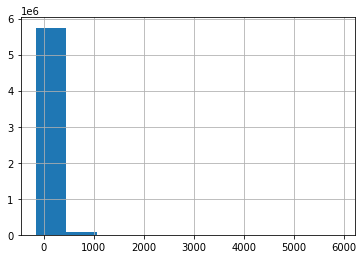

In [84]:
flights_df['Delay'].hist()

In [85]:
flights_df.Delay.value_counts()

Delay
 0.0       169967
-13.0      141717
-12.0      140964
-11.0      139860
-14.0      139826
            ...  
 2645.0         1
 2534.0         1
 2061.0         1
 2327.0         1
 4921.0         1
Name: count, Length: 2814, dtype: int64

In [86]:
# Function to determine the primary delay reason
def get_delay_reason(row):
    reasons = []
    for col in delay_col:
        if pd.notna(row[col]) and row[col] > 0:
            reasons.append(col)
    return ', '.join(reasons) if reasons else 'No Delay'

# Apply the function to each row
flights_df['DELAY_REASON'] = flights_df.apply(get_delay_reason, axis=1)

# Handle cases where flights are cancelled (optional, if you want to differentiate these)
flights_df.loc[flights_df['CANCELLED'] == 1, 'DELAY_REASON'] = 'Cancelled'

In [87]:
flights_df[flights_df['DELAY_REASON'] != 'No Delay']

,MONTH,DAY,DAY_OF_WEEK,AIRLINE_x,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,...,LATITUDE_ORIGIN,LONGITUDE_ORIGIN,AIRPORT_DESTINATION,CITY_DESTINATION,STATE_DESTINATION,COUNTRY_DESTINATION,LATITUDE_DESTINATION,LONGITUDE_DESTINATION,Delay,DELAY_REASON
2,1,1,4,US,SFO,CLT,00:20:00,00:18:00,-2.0,16.0,...,37.61900,-122.37484,Charlotte Douglas International Airport,Charlotte,NC,USA,35.21401,-80.94313,3.0,ARRIVAL_DELAY
5,1,1,4,DL,SFO,MSP,00:25:00,00:20:00,-5.0,18.0,...,37.61900,-122.37484,Minneapolis-Saint Paul International Airport,Minneapolis,MN,USA,44.88055,-93.21692,3.0,ARRIVAL_DELAY
7,1,1,4,US,LAX,CLT,00:30:00,00:44:00,14.0,13.0,...,33.94254,-118.40807,Charlotte Douglas International Airport,Charlotte,NC,USA,35.21401,-80.94313,4.0,DEPARTURE_DELAY
9,1,1,4,DL,LAS,ATL,00:30:00,00:33:00,3.0,12.0,...,36.08036,-115.15233,Hartsfield-Jackson Atlanta International Airport,Atlanta,GA,USA,33.64044,-84.42694,-12.0,DEPARTURE_DELAY
14,1,1,4,DL,SEA,MSP,00:40:00,00:39:00,-1.0,28.0,...,47.44898,-122.30931,Minneapolis-Saint Paul International Airport,Minneapolis,MN,USA,44.88055,-93.21692,7.0,ARRIVAL_DELAY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5819069,12,31,4,B6,LAS,JFK,23:59:00,02:38:00,159.0,34.0,...,36.08036,-115.15233,John F. Kennedy International Airport (New Yor...,New York,NY,USA,40.63975,-73.77893,477.0,"DEPARTURE_DELAY, ARRIVAL_DELAY, AIRLINE_DELAY"
5819071,12,31,4,B6,SLC,MCO,23:59:00,00:15:00,16.0,14.0,...,40.78839,-111.97777,Orlando International Airport,Orlando,FL,USA,28.42889,-81.31603,50.0,"DEPARTURE_DELAY, AIR_SYSTEM_DELAY, ARRIVAL_DEL..."
5819072,12,31,4,B6,DEN,JFK,23:59:00,00:06:00,7.0,13.0,...,39.85841,-104.66700,John F. Kennedy International Airport (New Yor...,New York,NY,USA,40.63975,-73.77893,-4.0,DEPARTURE_DELAY
5819073,12,31,4,B6,ABQ,JFK,23:59:00,00:15:00,16.0,9.0,...,35.04022,-106.60919,John F. Kennedy International Airport (New Yor...,New York,NY,USA,40.63975,-73.77893,19.0,"DEPARTURE_DELAY, ARRIVAL_DELAY"


Now that we captured the delay reason, we can drop th eindividual delay columns

In [88]:
flights_df.drop(columns=delay_col, inplace=True)

In [89]:
flights_df.isna().any()

MONTH                    False
DAY                      False
DAY_OF_WEEK              False
AIRLINE_x                False
ORIGIN_AIRPORT           False
DESTINATION_AIRPORT      False
SCHEDULED_DEPARTURE      False
DEPARTURE_TIME            True
TAXI_OUT                  True
WHEELS_OFF                True
SCHEDULED_TIME            True
ELAPSED_TIME              True
AIR_TIME                  True
DISTANCE                 False
WHEELS_ON                 True
TAXI_IN                   True
SCHEDULED_ARRIVAL         True
ARRIVAL_TIME              True
DIVERTED                 False
CANCELLED                False
CANCELLATION_REASON      False
AIRLINE_y                False
AIRPORT_ORIGIN            True
CITY_ORIGIN               True
STATE_ORIGIN              True
COUNTRY_ORIGIN            True
LATITUDE_ORIGIN           True
LONGITUDE_ORIGIN          True
AIRPORT_DESTINATION       True
CITY_DESTINATION          True
STATE_DESTINATION         True
COUNTRY_DESTINATION       True
LATITUDE

In [91]:
flights_df[['DEPARTURE_TIME','SCHEDULED_TIME','ELAPSED_TIME','AIR_TIME','SCHEDULED_ARRIVAL'
             ,'ARRIVAL_TIME' ,'DIVERTED' ,'CANCELLED','CANCELLATION_REASON' ,'Delay','DELAY_REASON']]

,DEPARTURE_TIME,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,SCHEDULED_ARRIVAL,ARRIVAL_TIME,DIVERTED,CANCELLED,CANCELLATION_REASON,Delay,DELAY_REASON
0,23:54:00,205.0,194.0,169.0,04:30:00,04:08:00,0,0,Not Canceled,-33.0,No Delay
1,00:02:00,280.0,279.0,263.0,07:50:00,07:41:00,0,0,Not Canceled,-17.0,No Delay
2,00:18:00,286.0,293.0,266.0,08:06:00,08:11:00,0,0,Not Canceled,3.0,ARRIVAL_DELAY
3,00:15:00,285.0,281.0,258.0,08:05:00,07:56:00,0,0,Not Canceled,-14.0,No Delay
4,00:24:00,235.0,215.0,199.0,03:20:00,02:59:00,0,0,Not Canceled,-22.0,No Delay
...,...,...,...,...,...,...,...,...,...,...,...
5819074,23:55:00,320.0,298.0,272.0,08:19:00,07:53:00,0,0,Not Canceled,-30.0,No Delay
5819075,23:55:00,227.0,215.0,195.0,04:46:00,04:30:00,0,0,Not Canceled,-20.0,No Delay
5819076,23:50:00,221.0,222.0,197.0,04:40:00,04:32:00,0,0,Not Canceled,-17.0,No Delay
5819077,23:53:00,161.0,157.0,144.0,03:40:00,03:30:00,0,0,Not Canceled,-16.0,No Delay


<Axes: >

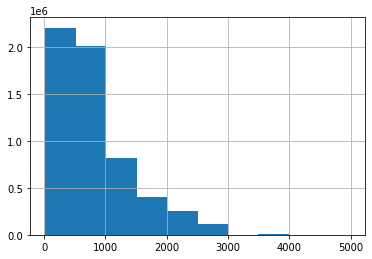

In [92]:
flights_df['DISTANCE'].hist()

In [93]:
flights_df['DISTANCE'].isna().value_counts()

DISTANCE
False    5819079
Name: count, dtype: int64

Checking the missing values on the flights that were not canceled or diverted:

In [94]:
flights_df[(flights_df['CANCELLED'] == 0) & (flights_df['DIVERTED'] == 0)].isna().sum()

MONTH                         0
DAY                           0
DAY_OF_WEEK                   0
AIRLINE_x                     0
ORIGIN_AIRPORT                0
DESTINATION_AIRPORT           0
SCHEDULED_DEPARTURE           0
DEPARTURE_TIME                0
TAXI_OUT                      0
WHEELS_OFF                  726
SCHEDULED_TIME                0
ELAPSED_TIME                  0
AIR_TIME                      0
DISTANCE                      0
WHEELS_ON                  1996
TAXI_IN                       0
SCHEDULED_ARRIVAL             1
ARRIVAL_TIME                  0
DIVERTED                      0
CANCELLED                     0
CANCELLATION_REASON           0
AIRLINE_y                     0
AIRPORT_ORIGIN           482878
CITY_ORIGIN              482878
STATE_ORIGIN             482878
COUNTRY_ORIGIN           482878
LATITUDE_ORIGIN          487439
LONGITUDE_ORIGIN         487439
AIRPORT_DESTINATION      482878
CITY_DESTINATION         482878
STATE_DESTINATION        482878
COUNTRY_

WHEELS ON and WHEELS OFF are part of airtime calculation so we can ignore these two columns.

In [102]:
flights_df.drop(columns=['WHEELS_ON','WHEELS_OFF'], inplace=True)

Let's look at the single flight with the scheduled arrival time missing:

In [103]:
flights_df[(flights_df['CANCELLED'] == 0) & (flights_df['DIVERTED'] == 0) & (flights_df['SCHEDULED_ARRIVAL'].isna())]

,MONTH,DAY,DAY_OF_WEEK,AIRLINE_x,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,TAXI_OUT,SCHEDULED_TIME,...,LATITUDE_ORIGIN,LONGITUDE_ORIGIN,AIRPORT_DESTINATION,CITY_DESTINATION,STATE_DESTINATION,COUNTRY_DESTINATION,LATITUDE_DESTINATION,LONGITUDE_DESTINATION,Delay,DELAY_REASON
1124523,3,14,6,F9,TPA,PHL,21:35:00,23:15:00,11.0,145.0,...,27.97547,-82.53325,Philadelphia International Airport,Philadelphia,PA,USA,39.87195,-75.24114,268.0,"DEPARTURE_DELAY, ARRIVAL_DELAY, LATE_AIRCRAFT_..."


This flight is also a delayed flight with important info captured in the other columns. So the missing value is the scheduled arriva time column is not important.

In [104]:
cancelled_flights = flights_df[flights_df['CANCELLED'] ==1]

In [105]:
flights_df['TAXI_OUT'].unique()

array([ 21.,  12.,  16.,  15.,  11.,  18.,  13.,  17.,  28.,  25.,   9.,
        30.,  14.,  10.,  nan,  43.,  24.,  19.,  22.,  23.,  37.,  31.,
         7.,  32.,  26.,  33.,  42.,  27.,  20.,  38.,   4.,  29.,   8.,
        41.,  56.,  48.,  40.,  34.,   3.,  36.,  61.,  35.,   6.,  45.,
        39.,  46.,  62.,  49.,   5.,  57.,  64.,  63.,  47.,  54.,  55.,
        44.,  59.,  50.,  76., 113.,  73.,  58.,  52.,   2.,  72.,  51.,
       110.,  53.,  75.,  84.,  77.,  82.,  70., 105.,  69.,  71.,  81.,
        66.,  80.,  99.,  60.,  74.,  95.,  89., 136., 131.,  79.,  68.,
       120.,  67.,  88.,   1.,  65., 176., 160., 104., 111., 112.,  83.,
        85., 121., 100.,  91.,  97.,  93.,  87., 129.,  92.,  90.,  98.,
       107., 124., 146.,  86.,  78., 115., 103.,  94., 101., 102., 126.,
       116., 132., 118., 106., 130., 109., 114., 128.,  96., 141., 125.,
       149., 147., 122., 117., 108., 119., 137., 133., 135., 169., 152.,
       139., 143., 155., 153., 127., 150., 134., 14

In [106]:
flights_df.isna().sum()

MONTH                         0
DAY                           0
DAY_OF_WEEK                   0
AIRLINE_x                     0
ORIGIN_AIRPORT                0
DESTINATION_AIRPORT           0
SCHEDULED_DEPARTURE           0
DEPARTURE_TIME            86155
TAXI_OUT                  89047
SCHEDULED_TIME                6
ELAPSED_TIME             105071
AIR_TIME                 105071
DISTANCE                      0
TAXI_IN                   92513
SCHEDULED_ARRIVAL             2
ARRIVAL_TIME              92524
DIVERTED                      0
CANCELLED                     0
CANCELLATION_REASON           0
AIRLINE_y                     0
AIRPORT_ORIGIN           486165
CITY_ORIGIN              486165
STATE_ORIGIN             486165
COUNTRY_ORIGIN           486165
LATITUDE_ORIGIN          490770
LONGITUDE_ORIGIN         490770
AIRPORT_DESTINATION      486165
CITY_DESTINATION         486165
STATE_DESTINATION        486165
COUNTRY_DESTINATION      486165
LATITUDE_DESTINATION     490775
LONGITUD

<Axes: >

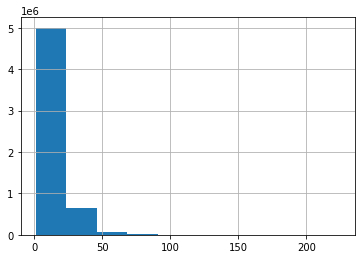

In [107]:
flights_df.TAXI_OUT.hist()

<Axes: >

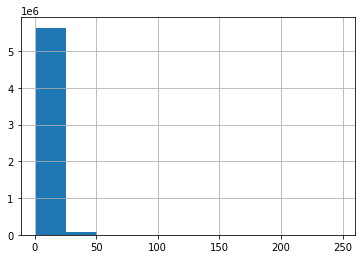

In [108]:
flights_df.TAXI_IN.hist()

In [110]:
flights_df.describe()

,MONTH,DAY,DAY_OF_WEEK,TAXI_OUT,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,TAXI_IN,DIVERTED,CANCELLED,LATITUDE_ORIGIN,LONGITUDE_ORIGIN,LATITUDE_DESTINATION,LONGITUDE_DESTINATION,Delay
count,5.819079e+06,5.819079e+06,5.819079e+06,5.730032e+06,5.819073e+06,5.714008e+06,5.714008e+06,5.819079e+06,5.726566e+06,5.819079e+06,5.819079e+06,5.328309e+06,5.328309e+06,5.328304e+06,5.328304e+06,5.819079e+06
mean,6.524085e+00,1.570459e+01,3.926941e+00,1.607166e+01,1.416859e+02,1.370062e+02,1.135116e+02,8.223565e+02,7.434971e+00,2.609863e-03,1.544643e-02,3.663806e+01,-9.549123e+01,3.663795e+01,-9.549102e+01,2.432554e+01
std,3.405137e+00,8.783425e+00,1.988845e+00,8.895574e+00,7.521058e+01,7.421107e+01,7.223082e+01,6.077843e+02,5.638548e+00,5.102012e-02,1.233201e-01,5.999338e+00,1.815637e+01,5.999285e+00,1.815616e+01,1.096048e+02
min,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.800000e+01,1.400000e+01,7.000000e+00,2.100000e+01,1.000000e+00,0.000000e+00,0.000000e+00,1.348345e+01,-1.766460e+02,1.348345e+01,-1.766460e+02,-1.620000e+02
25%,4.000000e+00,8.000000e+00,2.000000e+00,1.100000e+01,8.500000e+01,8.200000e+01,6.000000e+01,3.730000e+02,4.000000e+00,0.000000e+00,0.000000e+00,3.289595e+01,-1.119778e+02,3.289595e+01,-1.119778e+02,-1.700000e+01
50%,7.000000e+00,1.600000e+01,4.000000e+00,1.400000e+01,1.230000e+02,1.180000e+02,9.400000e+01,6.470000e+02,6.000000e+00,0.000000e+00,0.000000e+00,3.736186e+01,-9.025803e+01,3.736186e+01,-9.025803e+01,-6.000000e+00
75%,9.000000e+00,2.300000e+01,6.000000e+00,1.900000e+01,1.730000e+02,1.680000e+02,1.440000e+02,1.062000e+03,9.000000e+00,0.000000e+00,0.000000e+00,4.078839e+01,-8.168786e+01,4.078839e+01,-8.168786e+01,1.300000e+01
max,1.200000e+01,3.100000e+01,7.000000e+00,2.250000e+02,7.180000e+02,7.660000e+02,6.900000e+02,4.983000e+03,2.480000e+02,1.000000e+00,1.000000e+00,7.128545e+01,-6.479856e+01,7.128545e+01,-6.479856e+01,5.930000e+03


In [111]:
flights_df.CANCELLED.unique()

array([0, 1], dtype=int64)

In [112]:
for column in flights_df.select_dtypes(include=[np.number]).columns:
    print(column)
    # flights_df[column].fillna(flights_df[column].mean(), inplace=True)

MONTH
DAY
DAY_OF_WEEK
TAXI_OUT
SCHEDULED_TIME
ELAPSED_TIME
AIR_TIME
DISTANCE
TAXI_IN
DIVERTED
CANCELLED
LATITUDE_ORIGIN
LONGITUDE_ORIGIN
LATITUDE_DESTINATION
LONGITUDE_DESTINATION
Delay


In [113]:
flights_df.DIVERTED.value_counts()

DIVERTED
0    5803892
1      15187
Name: count, dtype: int64

In [114]:
flights_df.CANCELLATION_REASON.value_counts()

CANCELLATION_REASON
Not Canceled    5729195
B                 48851
A                 25262
C                 15749
D                    22
Name: count, dtype: int64

In [115]:
flights_df[flights_df['CANCELLED']==0][['CANCELLED','CANCELLATION_REASON']]

,CANCELLED,CANCELLATION_REASON
0,0,Not Canceled
1,0,Not Canceled
2,0,Not Canceled
3,0,Not Canceled
4,0,Not Canceled
...,...,...
5819074,0,Not Canceled
5819075,0,Not Canceled
5819076,0,Not Canceled
5819077,0,Not Canceled


In [116]:
flights_df[['CANCELLED','CANCELLATION_REASON']].value_counts()

CANCELLED  CANCELLATION_REASON
0          Not Canceled           5729195
1          B                        48851
           A                        25262
           C                        15749
           D                           22
Name: count, dtype: int64

In [117]:
flights_df[flights_df['CANCELLED']== 0][['CANCELLED','CANCELLATION_REASON']]

,CANCELLED,CANCELLATION_REASON
0,0,Not Canceled
1,0,Not Canceled
2,0,Not Canceled
3,0,Not Canceled
4,0,Not Canceled
...,...,...
5819074,0,Not Canceled
5819075,0,Not Canceled
5819076,0,Not Canceled
5819077,0,Not Canceled


In [118]:
flights_df[flights_df['CANCELLATION_REASON'].isna()] = 'Not Cancelled'

In [119]:
flights_df[['CANCELLED','CANCELLATION_REASON']].value_counts()

CANCELLED  CANCELLATION_REASON
0          Not Canceled           5729195
1          B                        48851
           A                        25262
           C                        15749
           D                           22
Name: count, dtype: int64

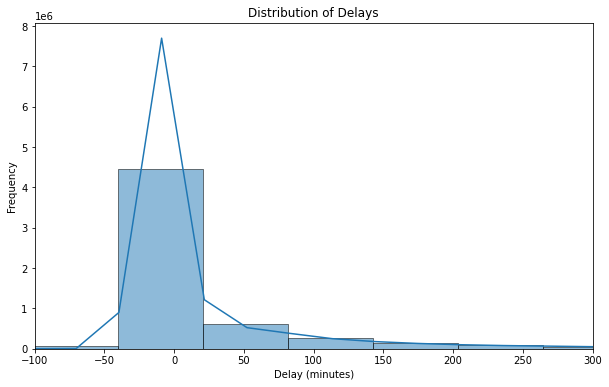

In [120]:
# Distribution of delays
plt.figure(figsize=(10, 6))
sns.histplot(flights_df['Delay'], bins=100, kde=True)
plt.title('Distribution of Delays')
plt.xlabel('Delay (minutes)')
plt.ylabel('Frequency')
plt.xlim(-100, 300)
plt.show()

In [121]:
flights_df['Delay'].value_counts()

Delay
 0.0       169967
-13.0      141717
-12.0      140964
-11.0      139860
-14.0      139826
            ...  
 2645.0         1
 2534.0         1
 2061.0         1
 2327.0         1
 4921.0         1
Name: count, Length: 2814, dtype: int64

In [123]:
# # EDA
# # Distribution of departure delays
# plt.figure(figsize=(10, 6))
# sns.histplot(flights_df['DEPARTURE_DELAY'], bins=100, kde=True)
# plt.title('Distribution of Departure Delays')
# plt.xlabel('Departure Delay (minutes)')
# plt.ylabel('Frequency')
# plt.xlim(-100, 300)
# plt.show()

In [124]:
# # EDA
# # Distribution of departure delays
# plt.figure(figsize=(10, 6))
# sns.histplot(flights_df['ARRIVAL_DELAY'], bins=100, kde=True)
# plt.title('Distribution of Arrival Delays')
# plt.xlabel('Arrival Delay (minutes)')
# plt.ylabel('Frequency')
# plt.xlim(-100, 300)
# plt.show()

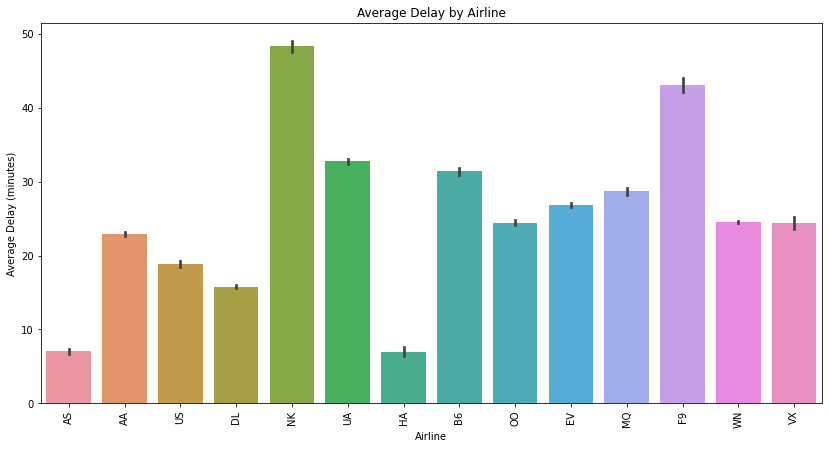

In [125]:
# Average delay by airline
plt.figure(figsize=(14, 7))
sns.barplot(x='AIRLINE_x', y='Delay', data=flights_df, estimator=np.mean)
plt.title('Average Delay by Airline')
plt.xlabel('Airline')
plt.ylabel('Average Delay (minutes)')
plt.xticks(rotation=90)
plt.show()

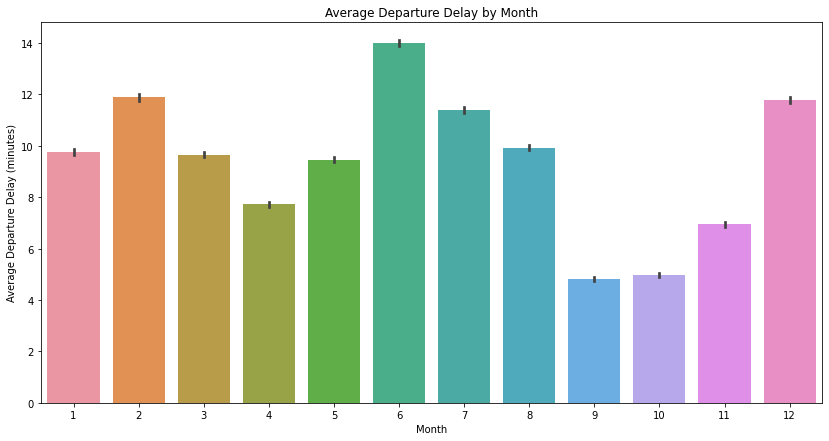

In [ ]:
# Average delay by month
plt.figure(figsize=(14, 7))
sns.barplot(x='MONTH', y='DEPARTURE_DELAY', data=flights_df, estimator=np.mean)
plt.title('Average Departure Delay by Month')
plt.xlabel('Month')
plt.ylabel('Average Departure Delay (minutes)')
plt.show()

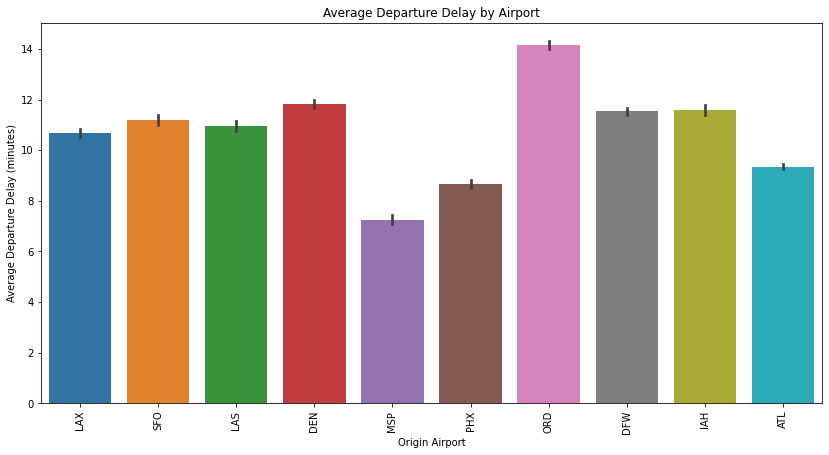

In [ ]:
# Average delay by airport
top_airports = flights_df['ORIGIN_AIRPORT'].value_counts().head(10).index
plt.figure(figsize=(14, 7))
sns.barplot(x='ORIGIN_AIRPORT', y='DEPARTURE_DELAY', data=flights_df[flights_df['ORIGIN_AIRPORT'].isin(top_airports)], estimator=np.mean)
plt.title('Average Departure Delay by Airport')
plt.xlabel('Origin Airport')
plt.ylabel('Average Departure Delay (minutes)')
plt.xticks(rotation=90)
plt.show()


In [126]:
# Save cleaned and merged data
flights_df.to_csv('../data/cleaned_flights_data.csv', index=False)